# Analyzing the Programming Challenges

The primary objective of this notebook is to analyze a file called "code_challenge.csv" that contains a wide array of programming challenges. The challenges cater to different skill levels, offering tasks suitable for beginners and more complex projects for advanced programmers. For instance, challenges may vary from basic calculations like "Calculate age in seconds" to advanced projects like "Game Engine in Unity" or "Ray Tracer."

These diverse problems are specifically designed for learning and practice purposes. Aspiring programmers can select challenges aligned with their proficiency and interests, allowing them to enhance their programming skills and delve into various areas of computer science and software development. Additionally, these challenges serve as valuable resources for educational settings and programming competitions, encouraging continuous learning and skill development within the programming community.

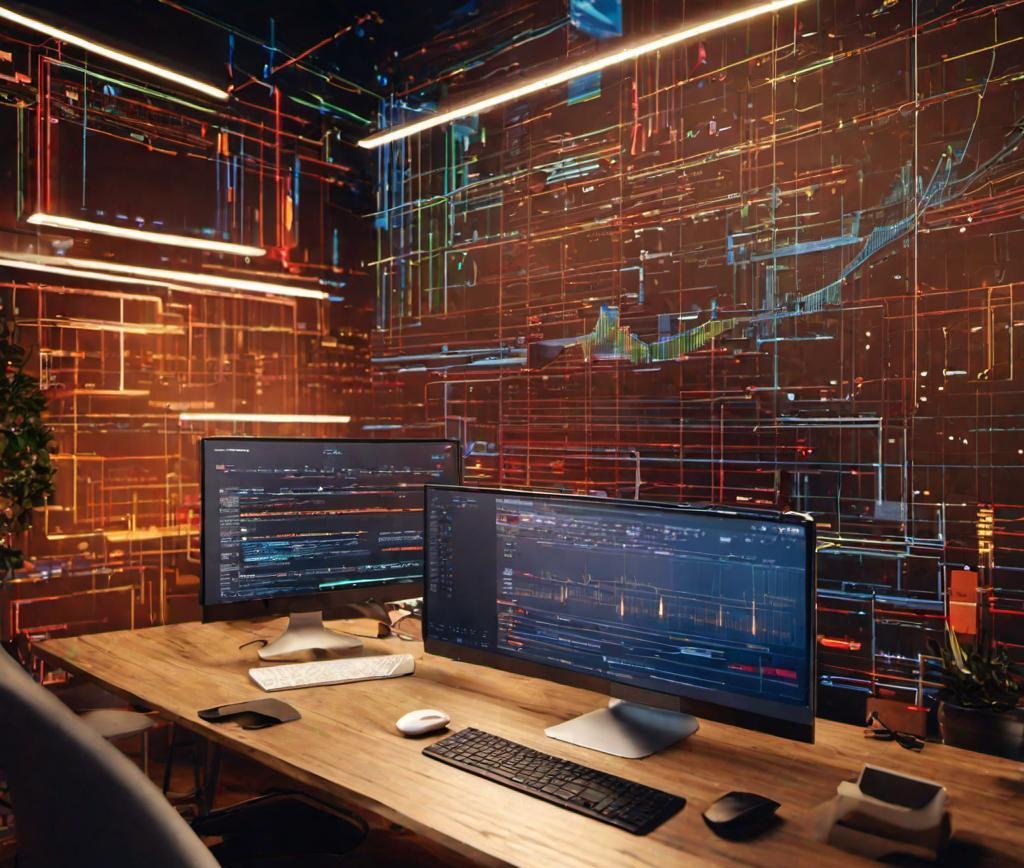

##  Loading, Preprocessing, and Displaying CSV Data

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


df = pd.read_csv('code_challenge.csv', delimiter=';', encoding='latin') 

# Drop index column
df = df.reset_index(drop=True) 

# Display dataframe again
display(df)

,id,name,description,difficulty
0,0,AI for Roguelikes,AI agents to play procedurally generated games,Intermediate
1,1,ASCII Digital Clock,Digital clock in ASCII art,Beginner
2,2,An Audio/Visual 64KB Demonstration,64KB intro with visuals synced to audio,Advanced
3,3,BMI calculator,Body mass index calculator,Beginner
4,4,Basic Bootloader,Bootloader for booting an OS kernel,Intermediate
...,...,...,...,...
218,218,Window Manager,Custom window manager for an OS GUI,Intermediate
219,219,Wolfenstein Clone,Clone of Wolfenstein 3D game,Intermediate
220,220,Write an Interpreted LIST-like Programming Lan...,Custom programming language interpreter,Intermediate
221,221,Yahtzee,Yahtzee dice game,Intermediate


## AI-Driven Data Visualization Recommendations

Based on the data in the CSV, here are some good visualizations that you can consider:

1. **Difficulty Distribution Bar Chart:** Create a bar chart showing the distribution of problems based on their difficulty levels. This will give you an overview of the number of problems in each difficulty category.

2. **Difficulty Pie Chart:** Alternatively, you can use a pie chart to show the proportion of problems in each difficulty category. This will provide a visual representation of the percentage of problems falling under each difficulty level.

3. **Difficulty vs. Number of Problems Line Plot:** Create a line plot that shows the trend of the number of problems for each difficulty level. This will help identify which difficulty level has the most or least number of problems.

4. **Word Cloud of Problem Descriptions:** Generate a word cloud using the problem descriptions to visualize the most frequently occurring words. This can provide insights into the common themes present in the problems.

5. **Scatter Plot of Difficulty vs. Problem ID:** Plot the difficulty levels on the y-axis and problem IDs on the x-axis using a scatter plot. This will help visualize the distribution of difficulties across the problem IDs.

6. **Histogram of Problem Descriptions Length:** Create a histogram to show the distribution of problem description lengths. This can give an idea of the typical length of problem descriptions.

7. **Heatmap of Difficulty by Problem Name Length:** Generate a heatmap that shows the difficulty levels based on the length of problem names. This can help identify any patterns between the name length and the difficulty assigned.

8. **Box Plot of Difficulty Distribution:** Use a box plot to visualize the distribution of difficulty levels. This will show the median, quartiles, and outliers, helping you understand the spread of difficulties.

9. **Stacked Bar Chart of Difficulty by Name Initials:** Group the problem names based on the first letter or initial and create a stacked bar chart to show the difficulty distribution for each initial. This may provide interesting insights into how the difficulty is distributed across different initial letters.

Remember to choose visualizations based on the specific insights you want to gain from the data. You can use Python libraries such as `matplotlib` or `seaborn` to create these visualizations with ease.

## Difficulty Distribution Bar Chart

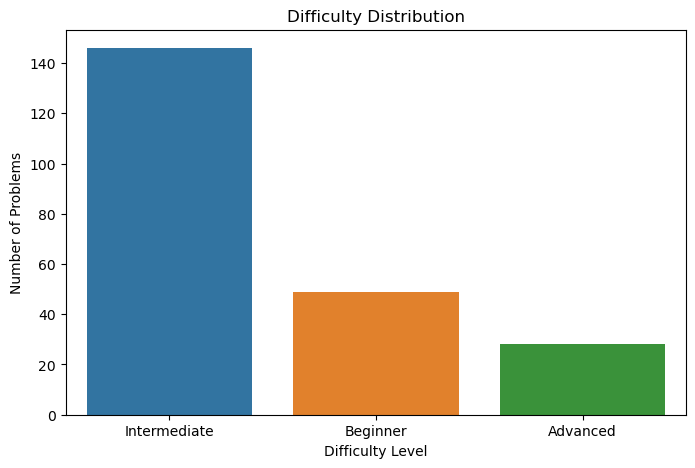

In [34]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='difficulty')
plt.title('Difficulty Distribution')
plt.xlabel('Difficulty Level')
plt.ylabel('Number of Problems')
plt.show()


## Difficulty Pie Chart

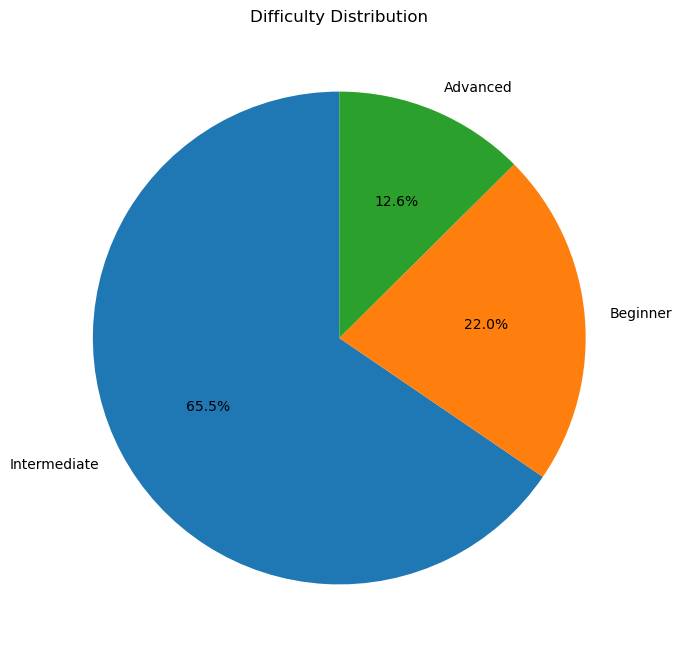

In [24]:
plt.figure(figsize=(8, 8))
df['difficulty'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Difficulty Distribution')
plt.ylabel('')
plt.show()


## Difficulty vs. Number of Problems Line Plot

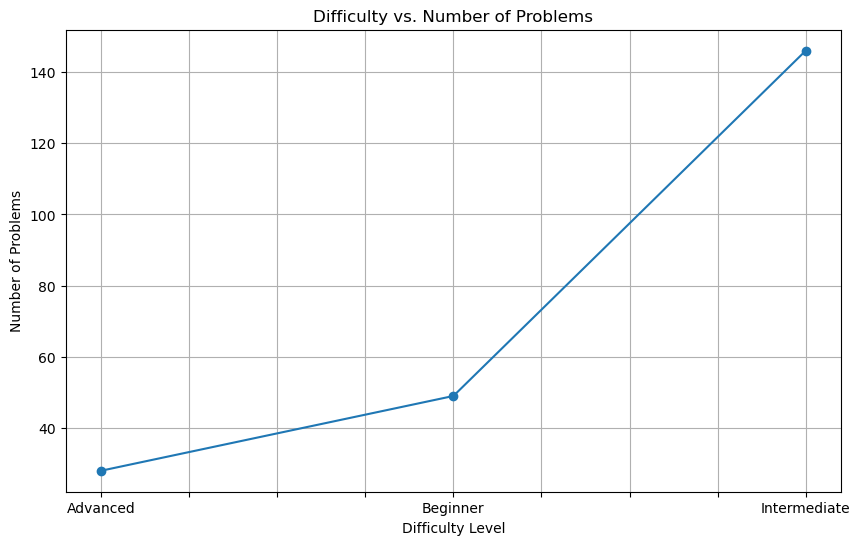

In [25]:
plt.figure(figsize=(10, 6))
df['difficulty'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Difficulty vs. Number of Problems')
plt.xlabel('Difficulty Level')
plt.ylabel('Number of Problems')
plt.grid(True)
plt.show()


## Word Cloud of Problem Descriptions

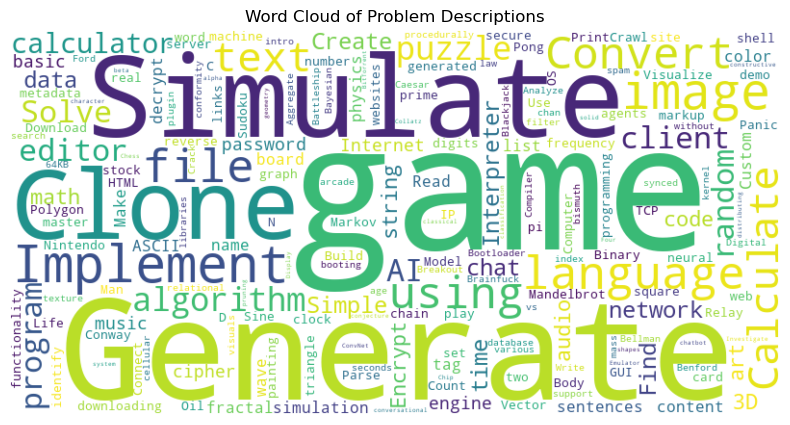

In [27]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['description']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Problem Descriptions')
plt.show()


## Scatter Plot of Difficulty vs. Problem ID

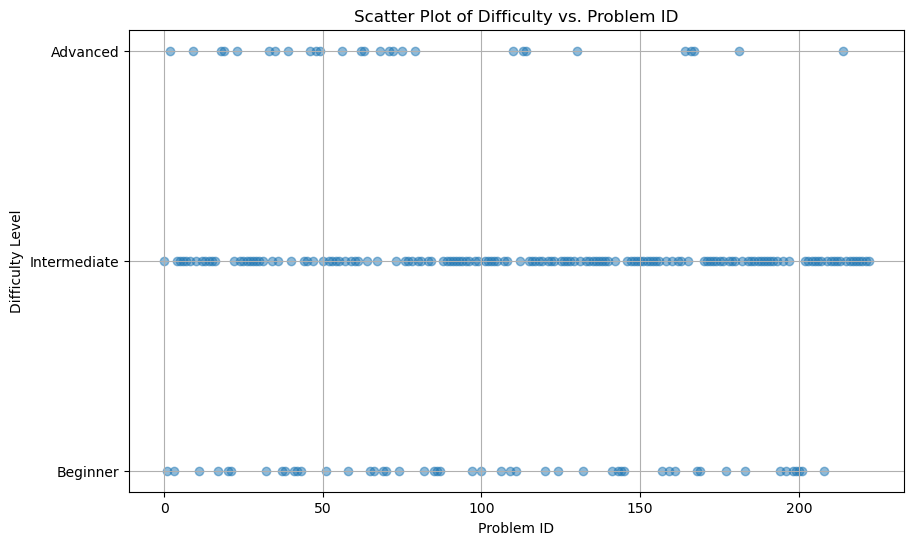

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['difficulty'].map({'Beginner': 1, 'Intermediate': 2, 'Advanced': 3}), alpha=0.5)
plt.title('Scatter Plot of Difficulty vs. Problem ID')
plt.xlabel('Problem ID')
plt.ylabel('Difficulty Level')
plt.yticks([1, 2, 3], ['Beginner', 'Intermediate', 'Advanced'])
plt.grid(True)
plt.show()


## Histogram of Problem Descriptions Length

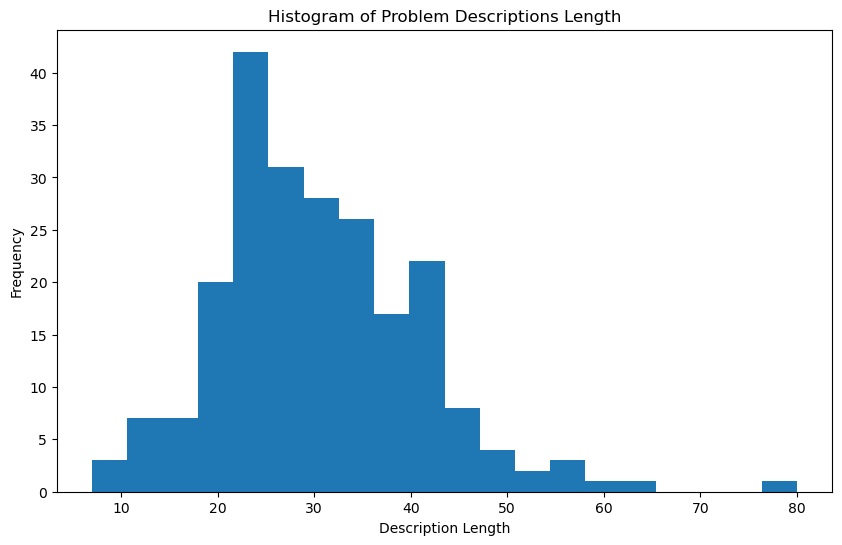

In [29]:
plt.figure(figsize=(10, 6))
df['description'].apply(len).plot(kind='hist', bins=20)
plt.title('Histogram of Problem Descriptions Length')
plt.xlabel('Description Length')
plt.ylabel('Frequency')
plt.show()

## Heatmap of Difficulty by Problem Name Length

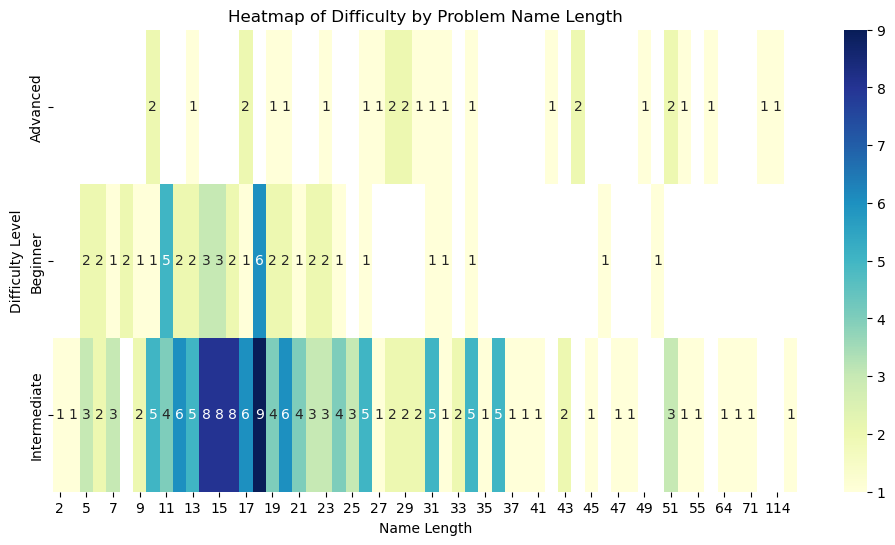

In [30]:
df['name_length'] = df['name'].apply(len)
heatmap_data = df.pivot_table(index='difficulty', columns='name_length', values='id', aggfunc='count')
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Heatmap of Difficulty by Problem Name Length')
plt.xlabel('Name Length')
plt.ylabel('Difficulty Level')
plt.show()


## Box Plot of Difficulty Distribution

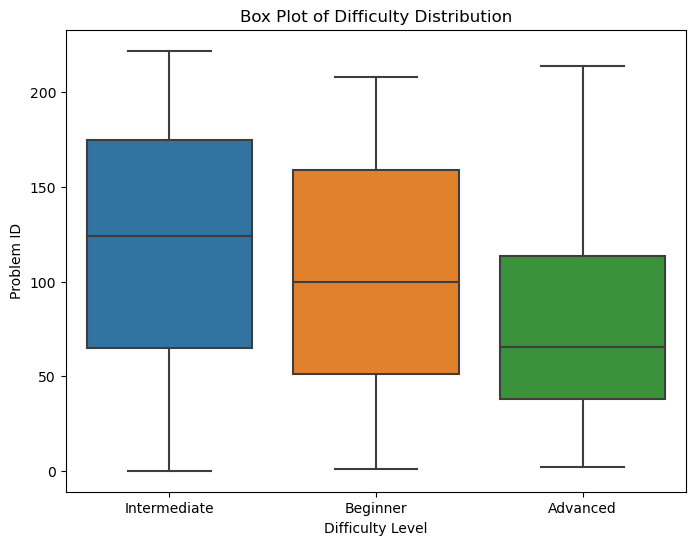

In [31]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='difficulty', y='id')
plt.title('Box Plot of Difficulty Distribution')
plt.xlabel('Difficulty Level')
plt.ylabel('Problem ID')
plt.show()

## Stacked Bar Chart of Difficulty by Name Initials

<Figure size 1200x600 with 0 Axes>

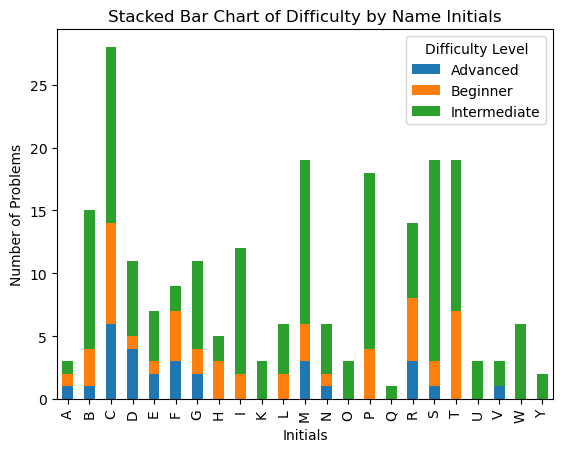

In [32]:
df['initial'] = df['name'].str[0]
plt.figure(figsize=(12, 6))
stacked_data = df.groupby(['initial', 'difficulty'])['id'].count().unstack()
stacked_data.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Difficulty by Name Initials')
plt.xlabel('Initials')
plt.ylabel('Number of Problems')
plt.legend(title='Difficulty Level')
plt.show()